In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditrisk.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP100000,Male,Yes,0.0,Graduate,No,21006,3787,110.0,360.0,1.0,Urban,Y
1,LP100001,Female,Yes,0.0,Graduate,No,9667,2096,128.0,360.0,NaN,Rural,Y
2,LP100002,Male,No,4.0,Graduate,No,6690,2208,279.0,240.0,1.0,Urban,Y
3,LP100003,Male,No,0.0,Graduate,No,6075,5988,91.0,300.0,1.0,Semiurban,N
4,LP100004,Male,No,0.0,Graduate,Yes,9227,175,266.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1000 non-null   object 
 1   Gender             1000 non-null   object 
 2   Married            1000 non-null   object 
 3   Dependents         1000 non-null   float64
 4   Education          1000 non-null   object 
 5   Self_Employed      1000 non-null   object 
 6   ApplicantIncome    1000 non-null   int64  
 7   CoapplicantIncome  1000 non-null   int64  
 8   LoanAmount         949 non-null    float64
 9   Loan_Amount_Term   948 non-null    float64
 10  Credit_History     950 non-null    float64
 11  Property_Area      1000 non-null   object 
 12  Loan_Status        1000 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 101.7+ KB


In [5]:
df.isnull().sum()[df.isnull().sum() > 0]

LoanAmount          51
Loan_Amount_Term    52
Credit_History      50
dtype: int64

In [6]:
df['LoanAmount'] = (df['LoanAmount'].fillna(df['LoanAmount']).mean())

In [7]:
df['LoanAmount'].isnull().sum()

0

In [8]:
df['Loan_Amount_Term'] = (df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()))

In [9]:
df['LoanAmount'].isnull().sum()

0

In [10]:
df['Credit_History'] = (df['Credit_History'].fillna(df['Credit_History'].mean()))

In [11]:
df['Credit_History'].isnull().sum()

0

In [12]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df.drop('Loan_ID', axis=1, inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [15]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0.0,0,0,21006,3787,175.25922,360.0,1.000000,2,1
1,0,1,0.0,0,0,9667,2096,175.25922,360.0,0.842105,0,1
2,1,0,4.0,0,0,6690,2208,175.25922,240.0,1.000000,2,1
3,1,0,0.0,0,0,6075,5988,175.25922,300.0,1.000000,1,0
4,1,0,0.0,0,1,9227,175,175.25922,360.0,1.000000,2,1


In [17]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=.2, random_state=42)

In [18]:
df.Loan_Status.value_counts()

Loan_Status
1    717
0    283
Name: count, dtype: int64

In [19]:
# Oversampling Required
# cr1 = df_train[df_train.Loan_Status == 0]

In [20]:
x_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:,-1]

x_test = df_train.iloc[:, :-1]
y_actual = df_train.iloc[:, -1]

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [22]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = dtc.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [25]:
confusion_matrix(y_actual, y_pred)

array([[225,   0],
       [  0, 575]], dtype=int64)

In [26]:
accuracy_score(y_actual, y_pred)

1.0

In [27]:
recall_score(y_actual, y_pred)

1.0

In [28]:
precision_score(y_actual, y_pred)

1.0

In [29]:
f1_score(y_actual, y_pred)

1.0

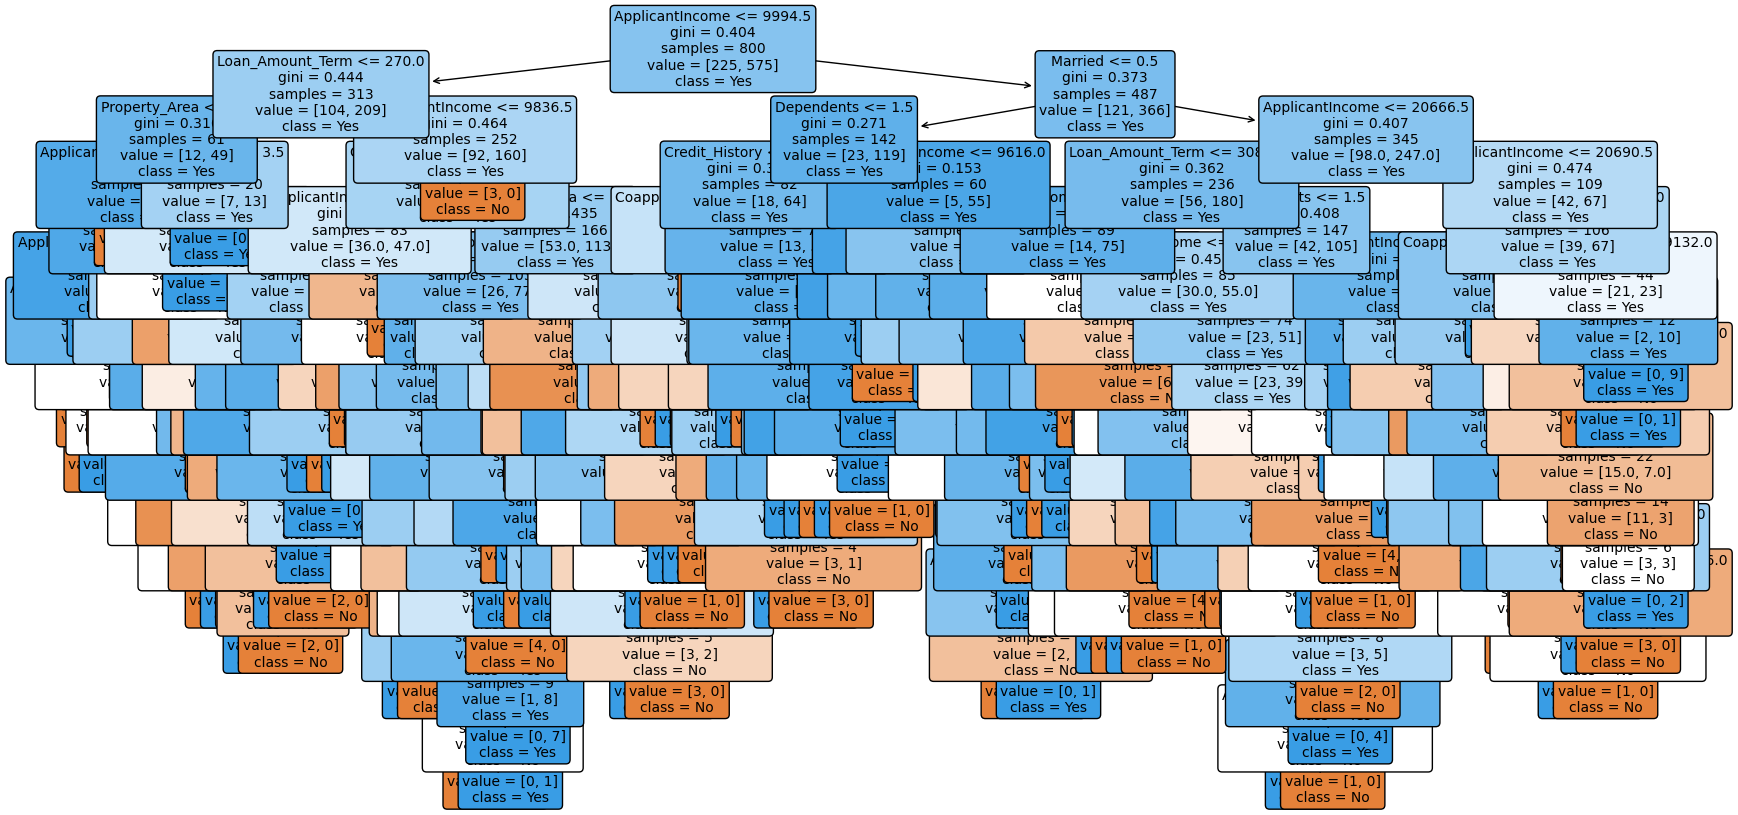

In [65]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=x_train.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.show()